## Blackjack

In this exercise, we will implement **Monte Carlo Policy Evaluation (MCPE)** to learn the state-value function $V(s)$ for a given policy in the game of [blackjack](https://en.wikipedia.org/wiki/Blackjack).

### The game

**Rules.** We will use the version of the game discussed in the lectures where a single player (the agent) plays against the dealer. The player's objective is to obtain cards whose sum is as large as possible without exceeding 21. All face cards count as 10; an ace can count as either 1 or 11.

The game begins with two cards dealt to both the dealer and the player. The first of the dealer’s cards is face down and the second is face up. If the player has 21 immediately (for example, an ace and a face card), it is called a "blackjack". The player then wins unless the dealer also has a blackjack, in which case the game is a draw. If the player does not have a blackjack, then she can request additional cards, one by one (_hits_), until she either stops (_sticks_) or exceeds 21 (_goes bust_). If the player goes bust, she loses; if she sticks, then it becomes the dealer’s turn. 

The dealer hits or sticks according to a fixed strategy without choice: he sticks on any sum of 17 or greater, hits otherwise. If the dealer goes bust, then the player wins; otherwise, the outcome (win, lose, or draw) is determined by whose final sum is closer to 21.

**MDP formulation.** Playing blackjack is naturally formulated as an episodic finite MDP. Each game of blackjack is an episode. Rewards of +1, −1, and 0 are given for winning, losing, and drawing, respectively. All rewards until the end of the game are zero. We do not discount ($\gamma = 1$); therefore these terminal rewards are also the returns. The player’s actions are to `"hit"` or to `"stick"`. 

The states depend on the player’s cards and the dealer’s showing card. Assume that cards are dealt from an infinite deck (that is, with replacement) so that there is no advantage to keeping track of the cards already dealt. If the player holds an ace that she could count as 11 without going bust, then the ace is said to be _usable_. In this case it is always counted as 11 because counting it as 1 would make the sum 11 or less, in which case there is no decision to be made because, obviously, the player should always hit. Thus, the player makes decisions on the basis of three variables: 
- the player's current sum (an integer between 12 and 21);
- the dealer’s one showing card (an integer between 1 and 10; note that the ace is counted as 1 here); and
- whether or not the player holds a usable ace (a boolean). 

This makes for a total of 200 states. We represent the state as a numpy-array of length 3 that combines the just mentioned three variables in the given order. For example, if the player is given a 6 and a _jack_, and the dealer's showing card is an ace, the corresponding state will be the numpy array `[16, 1, False]`. The terminal state of the game will be denoted by the numpy array `[-1, -1, -1]`.

###  Blackjack code 

In [1]:
import blackjack
env = blackjack.Blackjack(verbose=True)

In [2]:
import numpy as np
np.random.seed(8)
new_state, reward = env.make_step(action="reset")
print("Initial state:", new_state)
print("Reward:", reward)

The game is reset.
Player's cards: [10, 10]
Dealer's showing card: [7]
Initial state: [20  7  0]
Reward: 0


The player drew two cards with face value 10 each. The dealer also drew two cards, but we can only see the second card, a 7. The player now can choose to "hit" or "stick". Most players would stick if they had 20 on their hand. We call again the `make_step()` method and specify `action="stick"`.

In [3]:
new_state, reward = env.make_step(action = "stick")
print("The player obtains a reward of", reward)
print("The new (terminal) state is:", new_state)

The dealer's cards are: [10, 7]
The dealer has 17 points.
PLAYER WINS!
The player obtains a reward of 1
The new (terminal) state is: [-1 -1 -1]


The player won and received a reward of 1. Whenever an episode ends, the environment object sets the internal variable `self.active` to `False`. This variable is set to `True` again when we _reset_ the game. You can use the `self.active` variable to check whether an episode has ended or not.

In [4]:
np.random.seed(9)
new_state, reward = env.make_step(action="reset")
print("New state:", new_state)

The game is reset.
Player's cards: [11, 7]
Dealer's showing card: [2]
New state: [18  2  1]


The player has already 18 points but has a _usable ace_, which she can transfer into a 1 whenever she would _go bust_. The player can thus "hit" and hope that she gets closer to 21. 

In [5]:
new_state, reward = env.make_step(action = "hit")

Player draws card: [2]
New sum of player's cards: [20]


Great! The player got another 2 points and has again 20 points. The player would probably want to "stick" again...

In [6]:
new_state, reward = env.make_step(action = "stick")

The dealer's cards are: [7, 2]
The dealer has 9 points.
Dealer draws card: [3]
New dealer sum [12]
Dealer draws card: [6]
New dealer sum [18]
PLAYER WINS!


The player won again! Let's play a last one.

In [7]:
np.random.seed(7)
new_state, reward = env.make_step()
print("Reward:", reward)

The game is reset.
Player's cards: [11, 10]
Dealer's showing card: [10]
Player has Blackjack!
The dealer's cards are: [6, 10]
PLAYER WINS!
Reward: 1


The player drew a "Blackjack", that is, an ace and a 10. The dealer's cards valued 16. The player won again and received a reward without having performed an action. Try out some more games to get familiar with the code!

### Instructions

The task is to learn the state-value function for the policy **"Stick if the player's sum is 19 or higher, and hit otherwise."**. 



In [8]:
# This cell should compute the state values 'v' using MCPE.


In [9]:
import numpy as np
import itertools

env = blackjack.Blackjack(verbose = False)

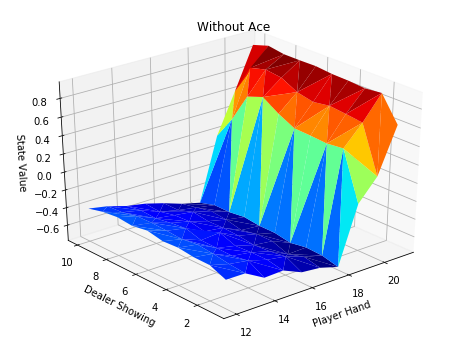

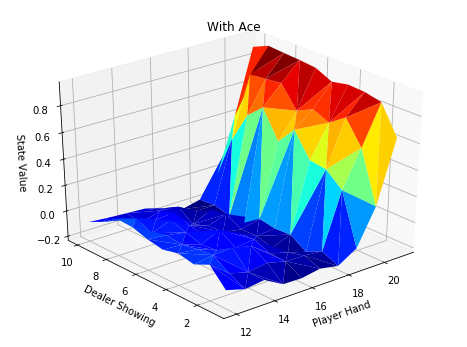

In [10]:
def MCPE(episodes, policy, env):
    
    """This function returns the matrix v which is the average of reward
        value in all episodes.
        
        ARGUMENTS
        ---------
        episodes: The number of episodes the MCPE needs to run
        policy: The agent needs to hit for values below policy and stick for values above policy
        env: The backjack Environment
        
        RETURNS
        -------
        v: average reward returns over all episodes
        """
    # The matrix v and v_count are initialized with zeros
    v = {key: 0 for key in itertools.product(np.arange(12,22),np.arange(1,11),np.arange(2))}
    v_count = {key: 0 for key in itertools.product(np.arange(12,22),np.arange(1,11),np.arange(2))}
    
    for episode in range(episodes):
        G = []                                  # Stores reward values for every state in an episode
        states = []                             # Stores state values for every state in an episode  
        env.reset_game()                        # Game is reset in the begining of the episode OR env is active
        old_state = env.state                   # Initial state
        states.append(old_state)
        
        # implement the policy
        while env.active == True:               # Only enters the loop when the env is active
            if old_state[0] >= policy:
                new_state, reward = env.make_step(action="stick") # stick for state above policy
            else:
                new_state, reward = env.make_step(action="hit")   # hit for state above policy
            states.append(new_state)            # Each state and reward are added to the episode matricies
            G.append(reward)
            
            # incremental update values
            if env.active == False:             # Only enters when game ends
                for s_i, s in enumerate(states[:-1]): # Calculates average reward for all states in the episode
                    returns = np.mean(G[s_i:])
                    v_count[s[0], s[1], s[2]] += 1
                    v[s[0], s[1], s[2]] = v[s[0], s[1], s[2]] +   \
                                          (returns - v[s[0], s[1], s[2]]) / v_count[s[0], s[1], s[2]]

            old_state = new_state               # Substitution
            
    return v

# train
v = MCPE(100000,19, env)




# Plotting a 3D graph for State Value v/s Player Hand and Dealer's Card

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline
x,y,z,X,Y,Z = [],[],[],[],[],[]
for i in v.keys():
    if i[2] == 0:
        x.append(i[0])
        y.append(i[1])
        z.append(v[i])
    else:
        X.append(i[0])
        Y.append(i[1])
        Z.append(v[i])
        
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.azim = 230
ax.plot_trisurf(x,y,z, linewidth=.02, cmap=cm.jet)
ax.set_title("Without Ace")
ax.set_xlabel("Player Hand")
ax.set_ylabel("Dealer Showing")
ax.set_zlabel("State Value")
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.azim = 230
ax.plot_trisurf(X,Y,Z, linewidth=.02, cmap=cm.jet)
ax.set_title("With Ace")
ax.set_xlabel("Player Hand")
ax.set_ylabel("Dealer Showing")
ax.set_zlabel("State Value")
plt.show()

In [11]:
print(v)

{(12, 1, 0): -0.4533333333333334, (12, 1, 1): -0.08993055555555557, (12, 2, 0): -0.3781473130402105, (12, 2, 1): 0.043495934959349586, (12, 3, 0): -0.37595752749336325, (12, 3, 1): -0.012015503875968983, (12, 4, 0): -0.35366218236173347, (12, 4, 1): 0.014705882352941192, (12, 5, 0): -0.36422991071428545, (12, 5, 1): -0.015079365079365092, (12, 6, 0): -0.32868092691622103, (12, 6, 1): 0.00803571428571428, (12, 7, 0): -0.3576759061833678, (12, 7, 1): 0.04523809523809523, (12, 8, 0): -0.33994457640538367, (12, 8, 1): 0.05245098039215686, (12, 9, 0): -0.3591028528528532, (12, 9, 1): -0.02412280701754385, (12, 10, 0): -0.40179340028694316, (12, 10, 1): -0.08071705426356592, (13, 1, 0): -0.45500739098300047, (13, 1, 1): -0.1321428571428571, (13, 2, 0): -0.4372881355932201, (13, 2, 1): -0.07200854700854703, (13, 3, 0): -0.40762273901808815, (13, 3, 1): 0.00976430976430976, (13, 4, 0): -0.3886071297317162, (13, 4, 1): -0.0031249999999999963, (13, 5, 0): -0.4115910727141822, (13, 5, 1): -0.0246

In [12]:
# Complete the function definition for get_state_value(s, v) in this cell.
def get_state_value(s, v):
    ### YOUR CODE HERE
    
    value_of_s = v[s]
    
    return value_of_s

s = (12,3,0) 
value_of_s = get_state_value(s, v)
print(value_of_s)

-0.37595752749336325


In [13]:
# This is a TEST CELL. We will use it to mark your solution. 
# All of your code must be written above this cell. 

In [14]:
# This is a TEST CELL. 

In [15]:
# This is a TEST CELL. 

In [16]:
# This is a TEST CELL. 

In [17]:
# This is a TEST CELL. 